In [151]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA

# Loading Train and Test Data

In [152]:
data = np.load('fashion_train.npy')
testdata = np.load('fashion_test.npy')

images = data[:, :-1]
labels = data[:, -1]
imagesdf = pd.DataFrame(images)
labelsdf = pd.DataFrame(labels, columns=['label'])


timages = testdata[:, :-1]
tlabels = testdata[:, -1]
timagesdf = pd.DataFrame(timages)
tlabelsdf = pd.DataFrame(tlabels, columns=['label'])

# 2 Principal Components

In [153]:
scaler = StandardScaler()
scaled_images = scaler.fit_transform(imagesdf)  
scaled_timages = scaler.transform(timagesdf) 

pca = PCA(2)
principal_comp = pca.fit_transform(scaled_images)
explained_variance = pca.explained_variance_ratio_
print(sum(explained_variance))

pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2'])
pca_df = pd.concat([pca_df,labelsdf], axis = 1)
pca_df

0.36319254850197447


,pca1,pca2,label
0,-0.504663,2.608573,0
1,-18.182703,0.285265,1
2,5.345144,-2.348569,0
3,-11.084712,1.340172,3
4,-1.613810,10.749582,4
...,...,...,...
9995,-0.217050,1.450272,4
9996,5.881807,-2.474948,0
9997,-4.364422,-15.213182,3
9998,-0.531598,-1.086622,0


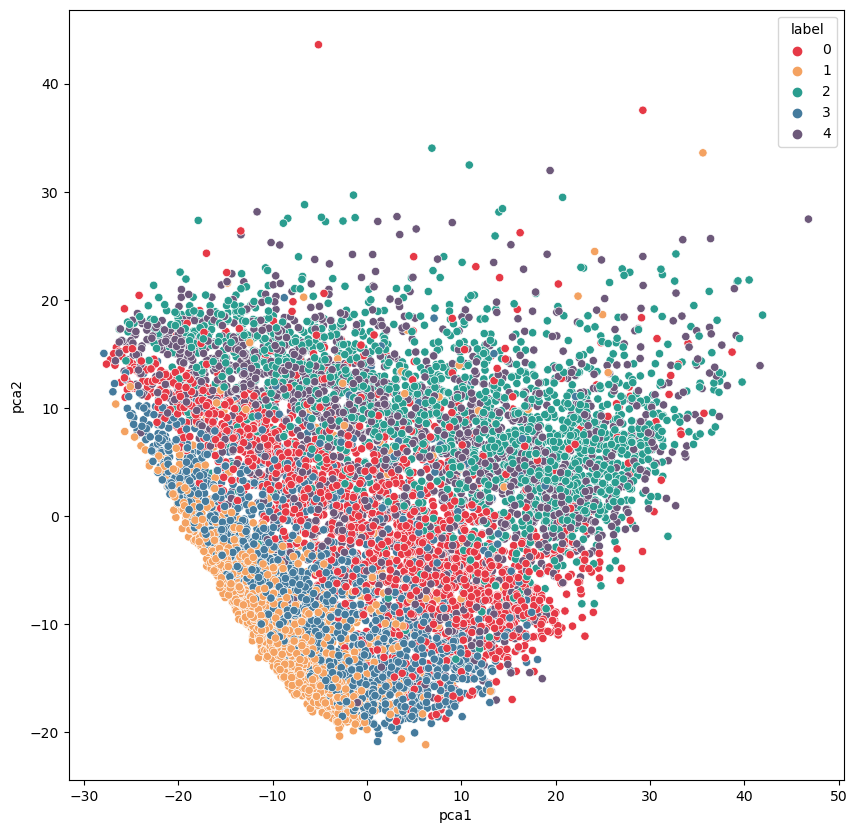

In [154]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "label", data = pca_df, palette =['#E63946', '#F4A261', '#2A9D8F', '#457B9D','#6D597A']
)
plt.show()

# First 100 Components

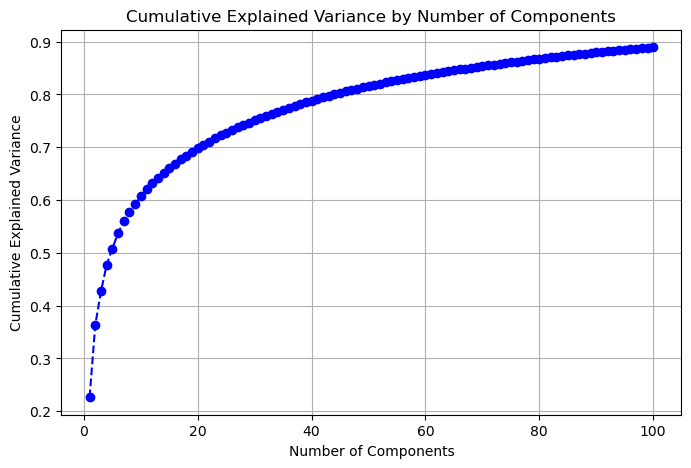

In [157]:
pca100 = PCA(100)
pca100.fit(scaled_images)

# Get explained variance ratios
cumulative_variance = np.cumsum(pca100.explained_variance_ratio_)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, 101), cumulative_variance, marker='o', linestyle='--', color='b')
plt.title('Cumulative Explained Variance by Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()


# Creating new NumPy file with 10 Principal Components

The resulting .npy files just need to be loaded in the classifiers instead of the original dataset when trying with PCA data

In [156]:
pca10 = PCA(10)
principal_comp10 = pca10.fit_transform(scaled_images)
explained_variance10 = pca10.explained_variance_ratio_
print(sum(explained_variance10))

0.6070044162998993


In [158]:
pca_df10 = pd.DataFrame(data=principal_comp10)
pca_df10 = pd.concat([pca_df10, labelsdf], axis=1)
pca_array10 = pca_df10.to_numpy()
np.save('pca_df10.npy', pca_array10)

In [159]:
principal_comp10_test = pca10.transform(scaled_timages)  
tpca_df10 = pd.DataFrame(data=principal_comp10_test)
tpca_df10 = pd.concat([tpca_df10, tlabelsdf], axis=1)

pca_array10_test = tpca_df10.to_numpy()
np.save('pca_df10_test.npy', pca_array10_test)